# 패키지 임포트

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import *
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt


# 2. 데이터 불러오기 및 확인

In [2]:
df = pd.read_csv('/content/heart_2020_cleaned.csv')

df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


# 3. 각 칼럼 정보 확인

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

# 4. 각 칼럼 통계치 확인

In [4]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


# 5. 명목형 변수 가변수 가공

In [7]:
# 하나의 가변수 범주 제거 옵션 적용
df2 = pd.get_dummies(df, columns=['HeartDisease', 'Smoking',
                                  'AlcoholDrinking', 'Stroke',
                                  'DiffWalking', 'Sex',
                                  'AgeCategory', 'Race',
                                  'Diabetic', 'PhysicalActivity',
                                  'GenHealth', 'Asthma',
                                  'KidneyDisease', 'SkinCancer'], drop_first=True, dtype =int)

df2.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,HeartDisease_Yes,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,AgeCategory_25-29,AgeCategory_30-34,AgeCategory_35-39,AgeCategory_40-44,AgeCategory_45-49,AgeCategory_50-54,AgeCategory_55-59,AgeCategory_60-64,AgeCategory_65-69,AgeCategory_70-74,AgeCategory_75-79,AgeCategory_80 or older,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,16.60,3.0,30.0,5.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,1,0,1
1,20.34,0.0,0.0,7.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
2,26.58,20.0,30.0,8.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,0
3,24.21,0.0,0.0,6.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
4,23.71,28.0,0.0,8.0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0


로지스틱 회귀분석을 하려면 명목형 변수를 0과 1의 가변수 형태로 변환해야 한다

# 6. 숫자형 변수의 스케일링 가공

In [8]:
# 숫자형 변수 분리
df_num = df[['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']]
df_nom = df2.drop(['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime'], axis=1)

# 숫자형 변수 RobustScaler 적용
RobustScaler = RobustScaler()
df_robust = RobustScaler.fit_transform(df_num)

# 칼럼명 결합
df_num2 = pd.DataFrame(data=df_robust, columns = df_num.columns)

# 숫자형 테이블과 더미화 문자형 테이블 결합
df3 = pd.concat([df_num2, df_nom], axis = 1)

df3.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,HeartDisease_Yes,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,AgeCategory_25-29,AgeCategory_30-34,AgeCategory_35-39,AgeCategory_40-44,AgeCategory_45-49,AgeCategory_50-54,AgeCategory_55-59,AgeCategory_60-64,AgeCategory_65-69,AgeCategory_70-74,AgeCategory_75-79,AgeCategory_80 or older,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,-1.453315,1.5,10.0,-1.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,1,0,1
1,-0.947226,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
2,-0.102842,10.0,10.0,0.5,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,0
3,-0.423545,0.0,0.0,-0.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
4,-0.491204,14.0,0.0,0.5,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0


로지스틱 회귀분석은 정규화 과정을 통해 과적합을 방지하는 프로세스가 있으므로 스케일을 조정해 줘야 한다

# 7. 학습셋과 테스트셋 분리

In [9]:
# 독립변수와 종속변수 분리하여 생성
X = df3.drop(['HeartDisease_Yes'], axis=1)
y = df3[['HeartDisease_Yes']]

# 학습셋과 테스트셋 분리하여 생성
X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size = 0.25, random_state = 10)    # 테스트 사이즈를 25퍼센트로 분리

# 학습셋과 테스트셋 잘 나뉘었는지 확인
print('train data 개수 : ', len(X_train))
print('test data 개수 : ', len(X_test))

train data 개수 :  239846
test data 개수 :  79949


# 8. 종속변수 클래스 분포 시각화

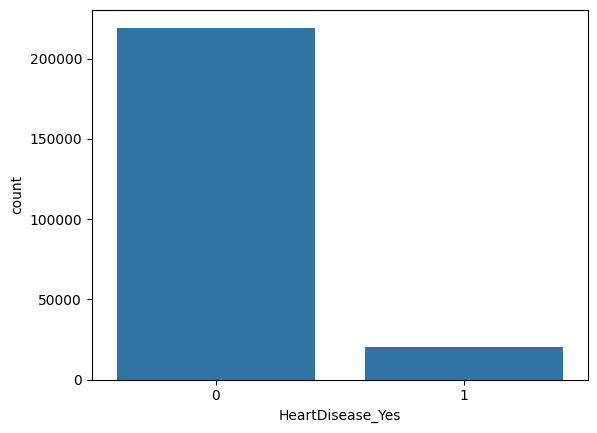

In [10]:
sns.countplot(x = 'HeartDisease_Yes', data = y_train)

plt.show()

1 값이 10% 미만으로 클래스 불균형이 심하다

언더샘플링이나 오버샘플링을 적용하여 클래스 균형을 맞춰야 한다

# 9. 변수명 임시 변경

In [11]:
X_train_re = X_train.copy()
y_train_re = y_train.copy()

X_temp_name =['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
               'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
               'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30',
               'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37']
y_temp_name = ['y1']

X_train_re.columns = X_temp_name
y_train_re.columns = y_temp_name

X_train_re.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37
163572,-0.202977,0.0,0.0,-0.5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
150901,1.476319,0.0,0.0,0.5,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
164527,-0.248985,15.0,10.0,-2.0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
260971,0.805142,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0
262287,0.612991,5.0,0.0,0.0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0


기존 변수명은 언더샘플링이나 오버샘플링 적용 시 오류가 발생하기 때문에

임시적으로 변수명을 변경해준다

# 10. 언더샘플링 적용

In [12]:
X_train_under, y_train_under = RandomUnderSampler(
    random_state = 0).fit_resample(X_train_re, y_train_re)

print('random under sampler 적용 전 학습셋 변수/레이블 데이터 세트: ',
        X_train_re.shape, y_train_re.shape)

print('random under sampler 적용 후 학습셋 변수/레이블 데이터 세트: ',
        X_train_under.shape, y_train_under.shape)

print('random under sampler 적용 전 레이블 값 분포: \n',
        pd.Series(y_train_re['y1'].value_counts()))

print('random under sampler 적용 후 레이블 값 분포: \n',
        pd.Series(y_train_under['y1'].value_counts()))

random under sampler 적용 전 학습셋 변수/레이블 데이터 세트:  (239846, 37) (239846, 1)
random under sampler 적용 후 학습셋 변수/레이블 데이터 세트:  (41036, 37) (41036, 1)
random under sampler 적용 전 레이블 값 분포: 
 y1
0    219328
1     20518
Name: count, dtype: int64
random under sampler 적용 후 레이블 값 분포: 
 y1
0    20518
1    20518
Name: count, dtype: int64


둘다 20518로 동일한 이율로 맞춰졌다

# 11. 기존 칼럼명 적용

In [13]:
X_train_under.columns = list(X_train)
y_train_under.columns = list(y_train)

X_train_under.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,AgeCategory_25-29,AgeCategory_30-34,AgeCategory_35-39,AgeCategory_40-44,AgeCategory_45-49,AgeCategory_50-54,AgeCategory_55-59,AgeCategory_60-64,AgeCategory_65-69,AgeCategory_70-74,AgeCategory_75-79,AgeCategory_80 or older,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,-0.572395,0.0,1.666667,0.5,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0
1,2.365359,6.0,0.333333,-0.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0
2,-0.964817,0.0,2.666667,0.5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0
3,-1.246279,0.0,0.000000,-0.5,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0
4,0.668471,15.0,0.000000,0.5,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0


# 12. 학습셋에 스크릿런 로지스틱 회귀모델 적용

In [15]:
model = LogisticRegression()
model.fit(X_train_under, y_train_under)

print('학습셋 모델 정확도: ', model.score(X_train_under, y_train_under))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


학습셋 모델 정확도:  0.7645482015791013


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


76%의 모델 정확도를 가졌다

# 13. 테스트셋에 스크릿런 로지스틱 회귀모델 적용

In [16]:
print('테스트셋 모델 정확도: ', model.score(X_test, y_test))

테스트셋 모델 정확도:  0.7501282067317915


학습셋과 거의 차이가 없기 때문에 과적합이나 과소적합이 없을 것으로 판단된다

# 14. 계숫값 확인

In [17]:
print(model.coef_)

[[ 7.96741949e-02  1.19040059e-02  2.93683087e-02 -5.45777557e-02
   4.06138674e-01 -2.46681966e-01  1.28145793e+00  2.00082859e-01
   7.60125260e-01 -5.75608270e-02  3.97227687e-01  4.15870850e-01
   7.88107431e-01  1.07631950e+00  1.52854195e+00  1.76621716e+00
   2.04611402e+00  2.33252984e+00  2.68481381e+00  2.84144667e+00
   3.20273244e+00 -5.28888236e-01 -2.43582138e-01 -1.83591001e-01
  -9.67855773e-02 -5.99487947e-02  2.81274969e-01  4.80241334e-01
   4.37410508e-01 -1.96628211e-03  1.49938246e+00  1.02768816e+00
   1.81080181e+00  4.45417783e-01  2.94521018e-01  6.17176662e-01
   1.41492522e-01]]


각 독립변수의 영향력을 확인하기 위해 계숫값을 산출한다

각 숫자의 크기와 음수인지 양수인지를 통해 각 독립변수가 종속 변수에 어떤 영향을 미치는지 파악할 수 있다

하지만 계숫값은 직관적이지 않기 때문에 참고용으로만 확인한다

# 15. 테스트셋에 statsmodels 로지스틱 회귀모델 적용

In [18]:
model2 = sm.Logit(y_train_under, X_train_under)
results = model2.fit(method ='newton')

results.summary()

Optimization terminated successfully.
         Current function value: 0.503919
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       HeartDisease_Yes   No. Observations:                41036
Model:                          Logit   Df Residuals:                    40999
Method:                           MLE   Df Model:                           36
Date:                Thu, 16 May 2024   Pseudo R-squ.:                  0.2730
Time:                        09:51:57   Log-Likelihood:                -20679.
converged:                       True   LL-Null:                       -28444.
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
BMI                                  0.0918      0.015      6.056      0.000       0.062       0.121
PhysicalHealth                       0.0114      0.003      3.367      0.001       0.005       0.018
MentalHealth                         0.0170      0.005      3.478      0.001       0.007       0.027
SleepTime                           -0.0733      0.016     -4.619      0.000      -0.104      -0.042
Smoking_Yes                          0.3696      0.025     14.807      0.000       0.321       0.419
AlcoholDrinking_Yes                 -0.2732      0.053     -5.107      0.000      -0.378      -0.168
Stroke_Yes                           1.2616      0.054     23.555      0.000       1.157       1.367
DiffWalking_Yes                      0.1708      0.035      4.907      0.000       0.103       0.239
Sex_Male                             0.6680      0.025     26.580      0.000       0.619       0.717
AgeCategory_25-29                   -1.4044      0.127    -11.088      0.000      -1.653      -1.156
AgeCategory_30-34                   -0.9200      0.103     -8.905      0.000      -1.122      -0.717
AgeCategory_35-39                   -0.9326      0.097     -9.634      0.000      -1.122      -0.743
AgeCategory_40-44                   -0.5486      0.089     -6.190      0.000      -0.722      -0.375
AgeCategory_45-49                   -0.2661      0.082     -3.244      0.001      -0.427      -0.105
AgeCategory_50-54                    0.1993      0.076      2.636      0.008       0.051       0.348
AgeCategory_55-59                    0.4354      0.072      6.049      0.000       0.294       0.576
AgeCategory_60-64                    0.7295      0.070     10.414      0.000       0.592       0.867
AgeCategory_65-69                    1.0211      0.070     14.680      0.000       0.885       1.157
AgeCategory_70-74                    1.3695      0.070     19.549      0.000       1.232       1.507
AgeCategory_75-79                    1.5302      0.073     20.958      0.000       1.387       1.673
AgeCategory_80 or older              1.8668      0.072     25.936      0.000       1.726       2.008
Race_Asian                          -2.6688      0.120    -22.307      0.000      -2.903      -2.434
Race_Black                          -2.3371      0.081    -28.721      0.000      -2.497      -2.178
Race_Hispanic                       -2.3334      0.080    -29.136      0.000      -2.490      -2.176
Race_Other                          -2.2070      0.093    -23.681      0.000      -2.390      -2.024
Race_White                          -2.1554      0.069    -31.379      0.000      -2.290      -2.021
Diabetic_No, borderline diabetes     0.2903      0.078      3.734      0.000       0.138       0.443
Diabetic_Yes                         0.4801      0.032     14.907      0.000       0.417       0.543
Diabetic_Yes (during pregnancy)      0.2256      0.164      1.376      0.169      -0.096       0.547
PhysicalA

statsmodels 패키지의 로지스틱 회귀 모델을 테스트셋에 적용

method 옵션에 newton을 넣었다

이는 newton-raphson iteration알고리즘으로 최적화에 용이한 것으로 알려져 있다

sklearn 방식과 동일하게 계숫값이 산출되며 모든 변수의 p-value도 확인할 수 있다

# 16. 독립변수의 오즈비 확인

In [19]:
np.exp(results.params)

BMI                                 1.096091
PhysicalHealth                      1.011469
MentalHealth                        1.017101
SleepTime                           0.929300
Smoking_Yes                         1.447148
AlcoholDrinking_Yes                 0.760970
Stroke_Yes                          3.530911
DiffWalking_Yes                     1.186292
Sex_Male                            1.950422
AgeCategory_25-29                   0.245524
AgeCategory_30-34                   0.398530
AgeCategory_35-39                   0.393534
AgeCategory_40-44                   0.577770
AgeCategory_45-49                   0.766331
AgeCategory_50-54                   1.220555
AgeCategory_55-59                   1.545532
AgeCategory_60-64                   2.074125
AgeCategory_65-69                   2.776307
AgeCategory_70-74                   3.933446
AgeCategory_75-79                   4.619038
AgeCategory_80 or older             6.467417
Race_Asian                          0.069335
Race_Black

각 독립변수가 종속변수인 심장병 여부 확률에 어떤 영향을 미치는지 확인하기 위해 오즈비를 산출한다

smoking_Yes 변수의 오즈비는 1.4이기 때문에 흡연자는 비흡연자보다 심장병 발생 확률이 1.4배 높다고 해석할 수 있다